In [1]:
import numpy as np
import pylab as pl 
%pylab inline

from sklearn import clone 
from sklearn.datasets import load_iris

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.forest import (RandomForestClassifier, ExtraTreesClassifier)

In [3]:
from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

RandomForest with 30 estimators with features [0, 1] has a score of 0.926666666667
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.926666666667
AdaBoost with 30 estimators with features [0, 1] has a score of 0.926666666667
RandomForest with 30 estimators with features [0, 2] has a score of 0.993333333333
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.993333333333
AdaBoost with 30 estimators with features [0, 2] has a score of 0.993333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.993333333333
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.993333333333
AdaBoost with 30 estimators with features [2, 3] has a score of 0.993333333333


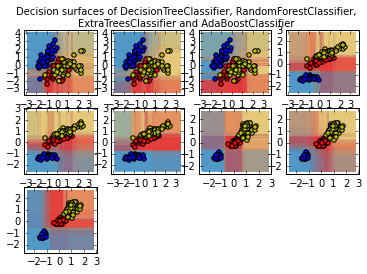

In [4]:
#parameter
n_classes = 3 # remember there are 4 kinds of iris 0,1,2,3 this is a supervised method!! so you will always know
n_estimators = 30 # this is the number of buckets
plot_colors = "bry"
plot_step = 0.02

# load data
iris = load_iris()

plot_idx = 1 # initiase the count of the plots (this is why there are multiple graphs)

for pair in ([0, 1], [0, 2], [2, 3]): # these are the features in the iris dataset 
    for model in (DecisionTreeClassifier(), # these are all ensemble techniques! 
                  RandomForestClassifier(n_estimators=n_estimators), # (this loop also instantiates the models)
                  ExtraTreesClassifier(n_estimators=n_estimators),
                  AdaBoostClassifier(DecisionTreeClassifier(), 
                                     n_estimators=n_estimators)):
        # We only take the two corresponding features
        X = iris.data[:, pair] 
        y = iris.target
        
        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(13)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        # Train
        clf = model.fit(X, y)
        
        # Get accuracy scores
        scores = clf.score(X, y)
        
        # Create a title for each column and the console by using str() and slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"): # this just prints lines with the word 'estimators' in
            model_details += " with {} estimators".format(len(model.estimators_))
            print model_details + " with features", pair, "has a score of", scores
            
            # Plot the decision boundary
            pl.subplot(3, 4, plot_idx) # i want a figure of 3 rows and 4 columns
            
            # this just makes the plot area
            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            
            xx, yy = np.meshgrid(np.arange(x_min, x_max,plot_step),
                                 np.arange(y_min, y_max,plot_step))
            
            if isinstance(model, DecisionTreeClassifier):
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = pl.contourf(xx, yy, Z, cmap=pl.cm.Paired)
            else:
                for tree in model.estimators_:
                    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                    Z = Z.reshape(xx.shape)
                    cs = pl.contourf(xx, yy, Z, alpha=0.1, cmap=pl.cm.Paired)
            pl.axis("tight")
            
            # Plot the training points on top of the grid
            for i, c in zip(xrange(n_classes), plot_colors):
                idx = np.where(y == i)
                pl.scatter(X[idx, 0], X[idx, 1], c=c,label=iris.target_names[i], 
                           cmap=pl.cm.Paired)
            
            pl.axis("tight")
            plot_idx += 1
            
pl.suptitle("Decision surfaces of DecisionTreeClassifier, "
            "RandomForestClassifier,\nExtraTreesClassifier"
            " and AdaBoostClassifier")
pl.show()
                                     

In [ ]:
# remeber that we did not split the dataset into test and train sets. To do this we would have to put all this in a loop!